# Эксперимент №6
https://archive.ics.uci.edu/ml/datasets/Cardiotocography

In [1]:
import sys
import os

sys.path.append('..')
folder_path = os.path.abspath(os.path.join(os.getcwd(), "../../evaluate"))
sys.path.append(folder_path)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tools import deletion_features
from tools import balancing
from tools import encoder
from tools import scaling
from Alg_CatBoost import CatBoostRegressor_fill 
from Alg_DecisionTree import DecisionTreeRegressor_fill
from Alg_Interpolate import interpolate_fill
from Alg_KNNImputer import KNNImputer_fill
from Alg_LinearRegression import LinearRegression_fill
from Alg_max import max_fill
from Alg_mean import mean_fill 
from Alg_median import median_fill
from Alg_min import min_fill
from Alg_RandomForestRegressor import RandomForestRegressor_fill
from Alg_SVR import SVR_fill
from Alg_XGBRegressor import XGBRegressor_fill
import results_metrics
import results_metrics_visualization

In [3]:
filepath = "./Data/CTG.xls"
df = pd.read_excel(filepath, sheet_name='Raw Data')
df = df[1:-3]
df = df.drop(columns=['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE'])
df 

LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    C    D  \
1     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  0.0  0.0   
2     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  0.0  0.0   
3     133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  0.0  0.0   
4     134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  0.0  0.0   
5     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  0.0  0.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...   
2122  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  ...  0.0  0.0   
2123  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  ...  0.0  0.0   
2124  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  ...  0.0  0.0   
2125  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  ...  0.0  0.0   
2126  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  ...  0.0  0.0   

        E   AD   DE   LD   FS  SUSP  CLASS  NSP  
1     0.0  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2     0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3     0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4     0.0  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
5     0.0  0.0  0.0  0.0  0.0   0.0    2.0  1.0  
...   ...  ...  ...  ...  ...   ...    ...  ...  
2122  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2123  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2124  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2125  1.0  0.0  0.0  0.0  0.0   0.0    5.0  2.0  
2126  0.0  0.0  0.0  0.0  0.0   0.0    1.0  1.0  

[2126 rows x 34 columns]

In [4]:
df.shape

(2126, 34)

# 1. Исследуем данные

In [5]:
df.head()

LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    C    D    E  \
1  120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  0.0  0.0  0.0   
2  132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  0.0  0.0  0.0   
3  133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  0.0  0.0  0.0   
4  134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  0.0  0.0  0.0   
5  132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  0.0  0.0  0.0   

    AD   DE   LD   FS  SUSP  CLASS  NSP  
1  0.0  0.0  0.0  1.0   0.0    9.0  2.0  
2  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
3  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
4  1.0  0.0  0.0  0.0   0.0    6.0  1.0  
5  0.0  0.0  0.0  0.0   0.0    2.0  1.0  

[5 rows x 34 columns]

In [6]:
#проверим данные на типы
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
DL          float64
DS          float64
DP          float64
DR          float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
A           float64
B           float64
C           float64
D           float64
E           float64
AD          float64
DE          float64
LD          float64
FS          float64
SUSP        float64
CLASS       float64
NSP         float64
dtype: object

In [7]:
#проверим на пропуски
df.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [8]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE',
       'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [9]:
print(len(df.columns))

34


<AxesSubplot:>

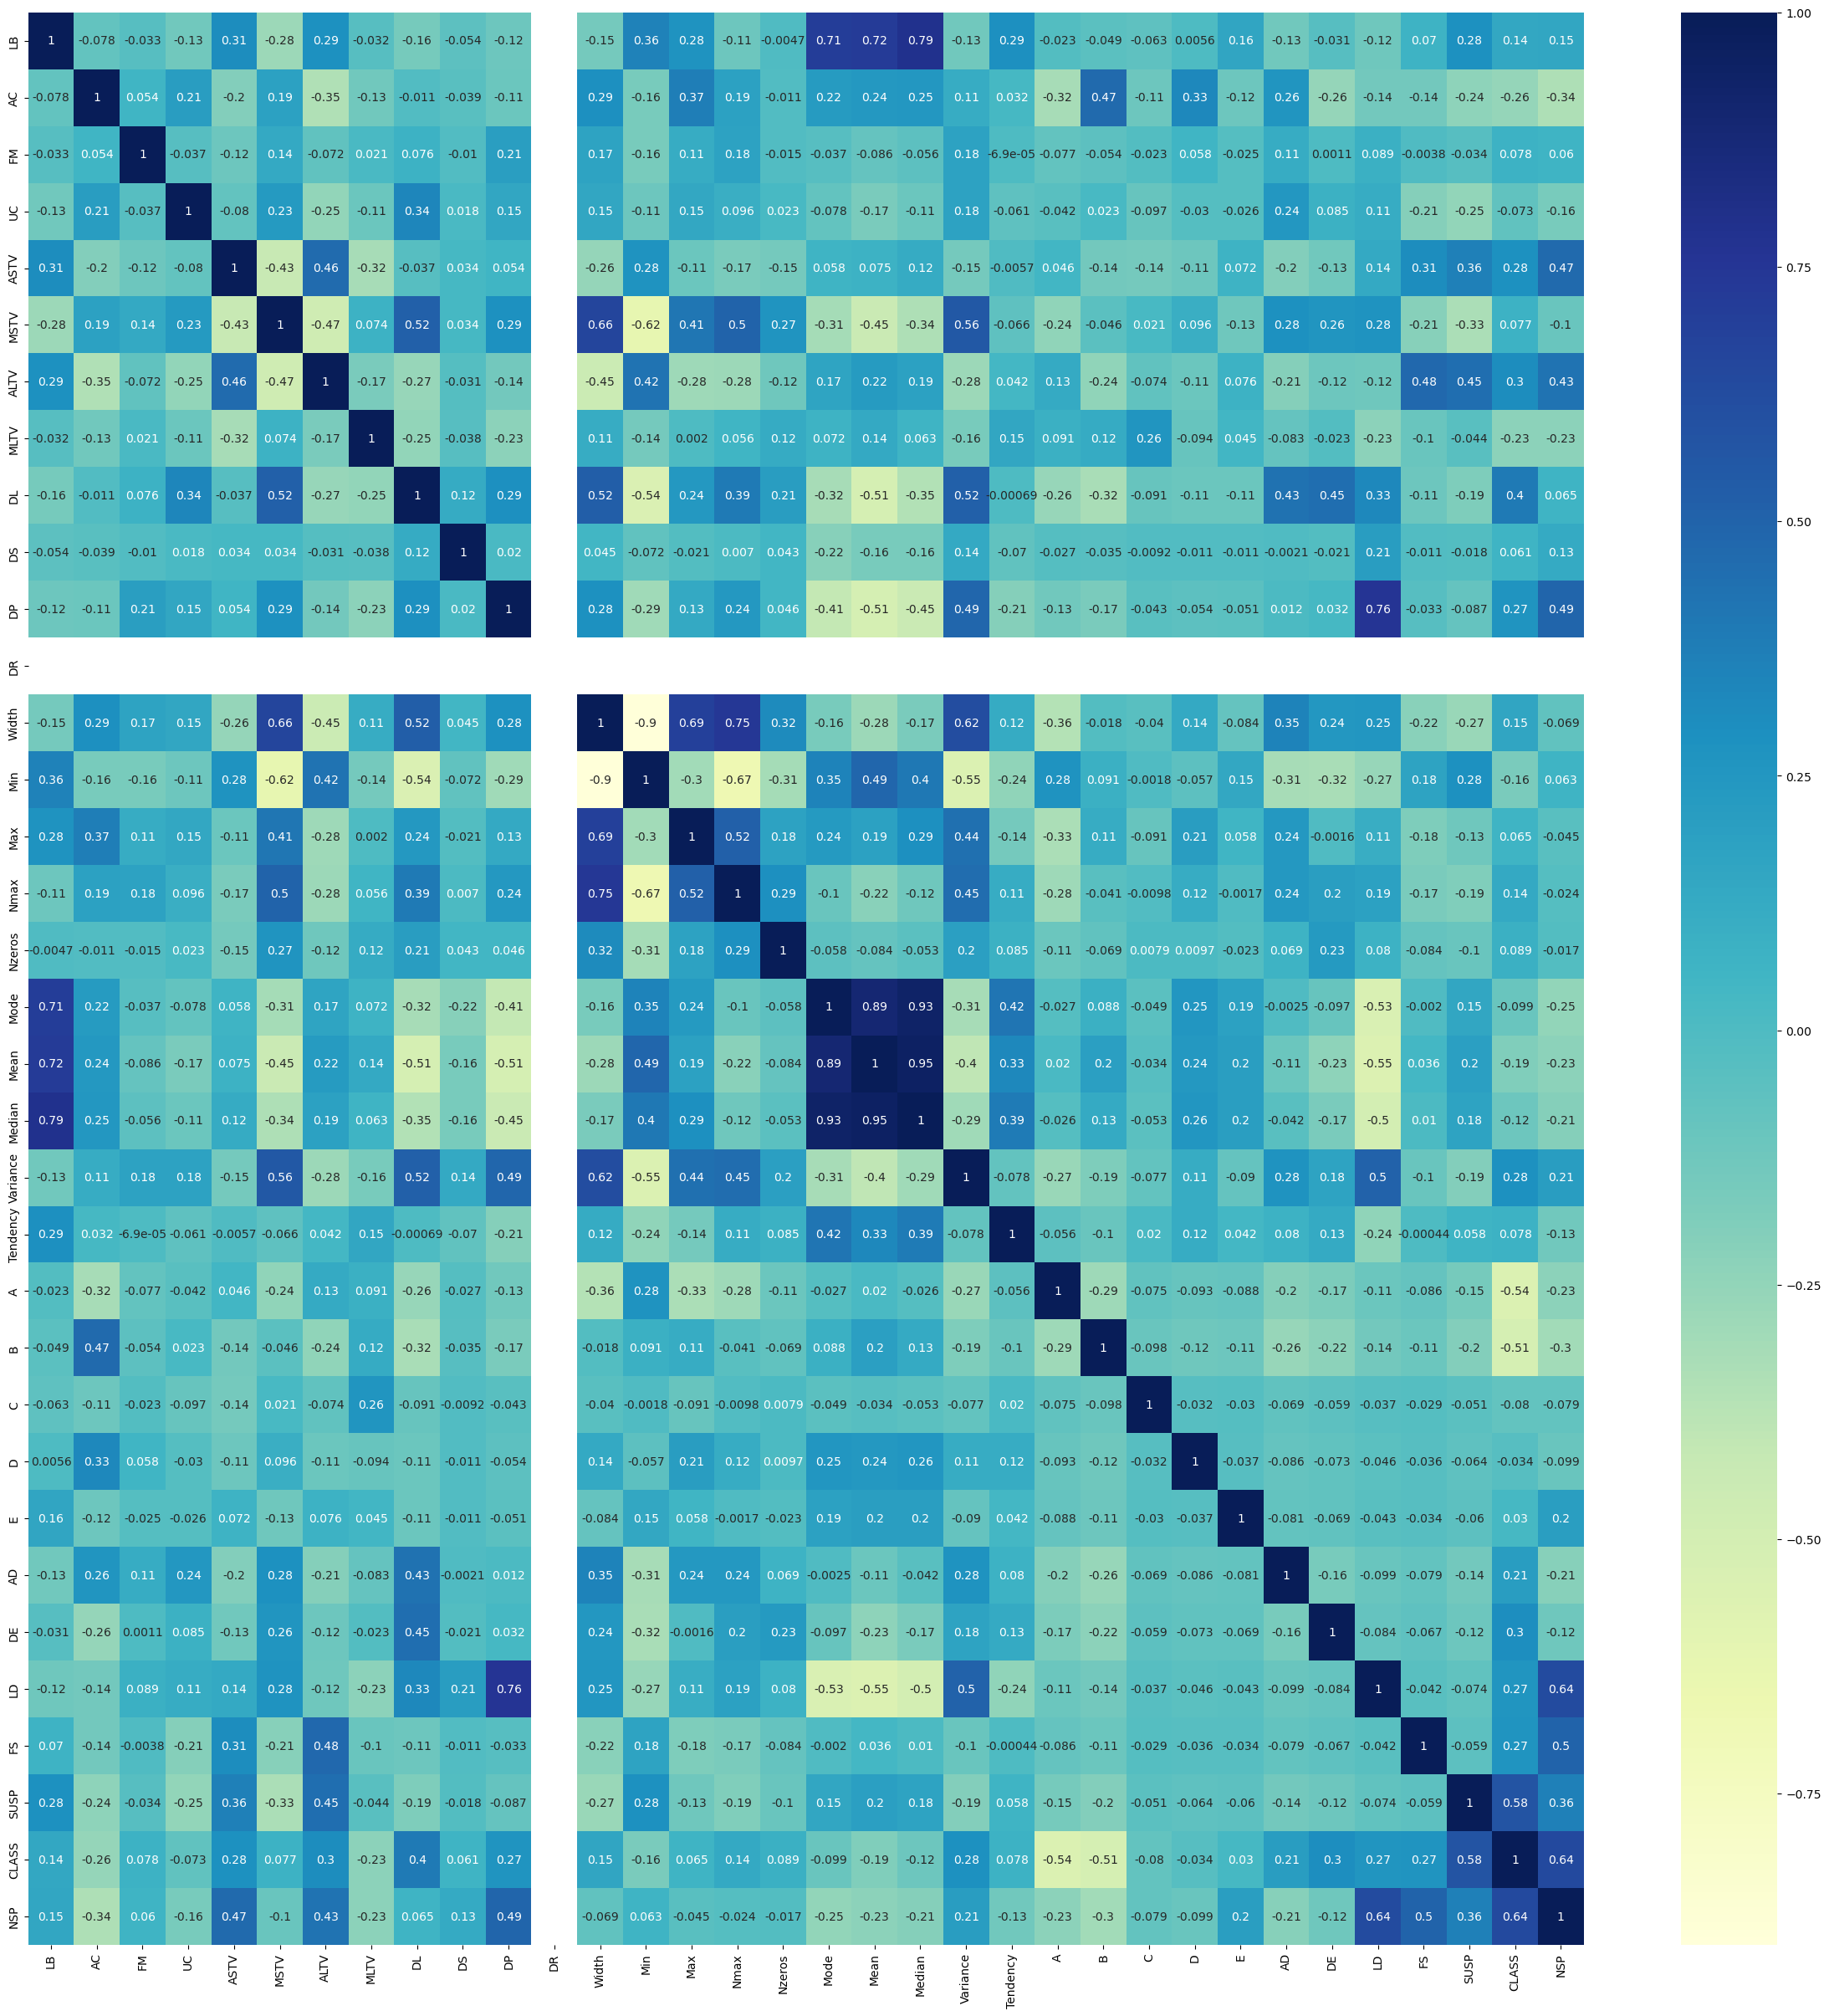

In [10]:
#построим корреляционную матрицу
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap='YlGnBu', annot=True)

# 2. Произведем предобработку данных

In [11]:
df.shape

(2126, 34)

# 2.3. Устранение дубликатов

In [12]:
#проверяем наличие дубликатов и удаляем их
data = df.drop_duplicates()
df.shape

(2126, 34)

# 2.5. Масштабирование данных

Произведем масштабирование данных

In [13]:
data = scaling.data_scaling(data)

In [14]:
data.shape

(2114, 34)

# 3. Работаем с пропусками

data - после предобработки данных был получен эталонный датасет с которым будет происходить сравнение по метрикам

In [15]:
data.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

# 3.1. Искусственно создаем пропуски

In [16]:
# искусственно создаем пропуски в данных, которые впоследствии будем заполнять
# выбираем случайный признак
np.random.seed(123)
df_copy = data.copy()
random_feature = np.random.choice(df_copy.columns)

In [17]:
df1 = deletion_features.make_missing_value(df_copy, 0.05, random_feature)

<AxesSubplot:>

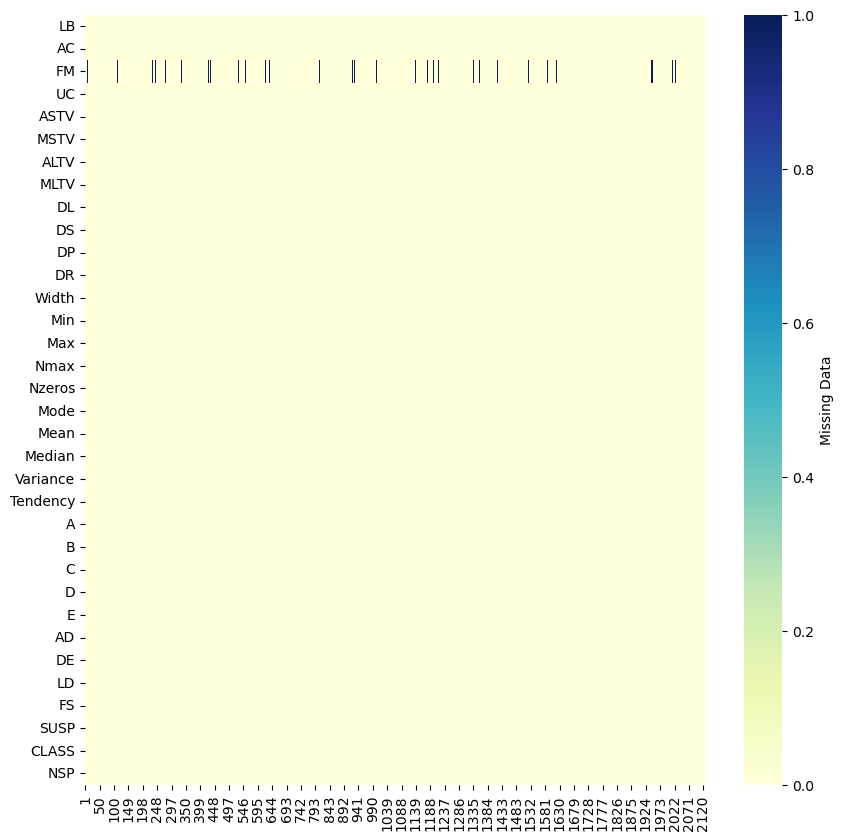

In [18]:
#визуализируем наличие пропусков
plt.figure(figsize=(10,10))
sns.heatmap(pd.DataFrame(df1).isna().transpose(), cmap = "YlGnBu", cbar_kws={'label':'Missing Data'})

In [19]:
df1.isna().sum()

LB            0
AC            0
FM          105
UC            0
ASTV          0
MSTV          0
ALTV          0
MLTV          0
DL            0
DS            0
DP            0
DR            0
Width         0
Min           0
Max           0
Nmax          0
Nzeros        0
Mode          0
Mean          0
Median        0
Variance      0
Tendency      0
A             0
B             0
C             0
D             0
E             0
AD            0
DE            0
LD            0
FS            0
SUSP          0
CLASS         0
NSP           0
dtype: int64

создадим датасет с 15% пропусков для сравнения результатов заполнения

In [20]:
df15 = deletion_features.make_missing_value(df_copy, 0.2, random_feature)
df15.isna().sum()

LB            0
AC            0
FM          422
UC            0
ASTV          0
MSTV          0
ALTV          0
MLTV          0
DL            0
DS            0
DP            0
DR            0
Width         0
Min           0
Max           0
Nmax          0
Nzeros        0
Mode          0
Mean          0
Median        0
Variance      0
Tendency      0
A             0
B             0
C             0
D             0
E             0
AD            0
DE            0
LD            0
FS            0
SUSP          0
CLASS         0
NSP           0
dtype: int64

In [21]:
df20 = deletion_features.make_missing_value(df_copy, 0.35, random_feature)
df20.isna().sum()

LB            0
AC            0
FM          739
UC            0
ASTV          0
MSTV          0
ALTV          0
MLTV          0
DL            0
DS            0
DP            0
DR            0
Width         0
Min           0
Max           0
Nmax          0
Nzeros        0
Mode          0
Mean          0
Median        0
Variance      0
Tendency      0
A             0
B             0
C             0
D             0
E             0
AD            0
DE            0
LD            0
FS            0
SUSP          0
CLASS         0
NSP           0
dtype: int64

# 3.2. Заполняем пропуски

#1. Заполним пропуски средним арифметическим значением по признаку

In [22]:
df_mean_fill = mean_fill.mean_fill(df1)

In [23]:
df_mean_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#2. Заполним пропуски медианным значением по признаку

In [24]:
df_median_fill = median_fill.median_fill(df1)
df_median_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#3. Заполним пропуски минимальным значением по признаку

In [25]:
df_min_fill = min_fill.min_fill(df1)
df_min_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#4. Заполним пропуски максимальным значением по признаку

In [26]:
df_max_fill = df_min_fill = max_fill.max_fill(df1)
df_max_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#5. Заполним пропуски используя интерполяцию

интерполяция даже при 10% пропусков по признакам не в состоянии восстановить все значения (напишем свой алгоритм заполнения на основе интерполяции)

In [27]:
df_interpolate_fill = interpolate_fill.interpolate_fill(df1)
df_interpolate_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#6. Заполним пропуски используя линейную регрессию

In [28]:
df_LinearReg_fill = LinearRegression_fill.linreg_imputer(df1)
df_LinearReg_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#7 Заполним пропуски используя KNNImputer

KNNImputer при 15% пропусков по признаку не смог восстановить все значения (напишем свой алгоритм заполнения на основе KNN)

In [29]:
df_KNNImputer_fill = KNNImputer_fill.KNNImputer_fill(df1)
df_KNNImputer_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#8 Заполним пропуски используя дерево решений

In [30]:
df_DecisionTree_fill = DecisionTreeRegressor_fill.DecisionTree_imputer(df1)
df_DecisionTree_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#9 Заполним пропуски используя случайный лес

In [31]:
df_RandomForest_fill = RandomForestRegressor_fill.RandomForest_imputer(df1)
df_RandomForest_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#10 Заполним пропуски используя SVM

In [32]:
df_SVM_fill = SVR_fill.SVM_imputer(df1)
df_SVM_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#11 Заполним пропуски используя градиентный бустинг - XGboost

In [33]:
df_XGBRegressor_fill = XGBRegressor_fill.XGBRegressor_imputer(df1)
df_XGBRegressor_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

#12 Заполним пропуски используя градиентный бустинг - CatBoost

In [34]:
df_CatBoostRegressor_fill = CatBoostRegressor_fill.CatBoostRegressor_imputer(df1)
df_CatBoostRegressor_fill.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [35]:
data.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [36]:
df1.isna().sum()

LB            0
AC            0
FM          105
UC            0
ASTV          0
MSTV          0
ALTV          0
MLTV          0
DL            0
DS            0
DP            0
DR            0
Width         0
Min           0
Max           0
Nmax          0
Nzeros        0
Mode          0
Mean          0
Median        0
Variance      0
Tendency      0
A             0
B             0
C             0
D             0
E             0
AD            0
DE            0
LD            0
FS            0
SUSP          0
CLASS         0
NSP           0
dtype: int64

# 4. Формируем результаты эксперимента

In [37]:
all_methods = [df_mean_fill, df_median_fill, df_min_fill, df_max_fill, df_interpolate_fill, df_LinearReg_fill, df_KNNImputer_fill, df_DecisionTree_fill, df_RandomForest_fill, df_SVM_fill, df_XGBRegressor_fill, df_CatBoostRegressor_fill]
df1_result = results_metrics.generate_results_metrics(data, all_methods)
df1_result

Mean_absolute_error  Mean_squared_error  r2_score
Mean                          0.000463            0.001288  0.998653
Median                        0.000314            0.001355  0.998586
Min                           0.021823            0.327300  0.971588
Max                           0.021823            0.327300  0.971588
Interpolate                   0.000173            0.000287  0.999723
LinearReg                     0.000485            0.001109  0.998845
KNNImputer                    0.000399            0.001122  0.998844
DecisionTree                  0.000256            0.000726  0.999305
RandomForest                  0.000287            0.000423  0.999564
SVM                           0.000302            0.001178  0.998770
XGBRegressor                  0.000240            0.000359  0.999650
CatBoostRegressor             0.000264            0.000285  0.999708

In [38]:
all_methods = [mean_fill.mean_fill(df15), median_fill.median_fill(df15), min_fill.min_fill(df15), max_fill.max_fill(df15), interpolate_fill.interpolate_fill(df15),
              LinearRegression_fill.linreg_imputer(df15), KNNImputer_fill.KNNImputer_fill(df15), DecisionTreeRegressor_fill.DecisionTree_imputer(df15),
              RandomForestRegressor_fill.RandomForest_imputer(df15), SVR_fill.SVM_imputer(df15), XGBRegressor_fill.XGBRegressor_imputer(df15), CatBoostRegressor_fill.CatBoostRegressor_imputer(df15)]
df15_result = results_metrics.generate_results_metrics(data, all_methods)
df15_result

Mean_absolute_error  Mean_squared_error  r2_score
Mean                          0.001721            0.005047  0.993907
Median                        0.001046            0.005231  0.993734
Min                           0.001046            0.005231  0.993734
Max                           0.086826            1.288914  0.963861
Interpolate                   0.000645            0.001508  0.998446
LinearReg                     0.002155            0.005052  0.994091
KNNImputer                    0.001388            0.004108  0.995430
DecisionTree                  0.000778            0.001842  0.998246
RandomForest                  0.001219            0.002752  0.996960
SVM                           0.001108            0.004654  0.994416
XGBRegressor                  0.000976            0.001827  0.998138
CatBoostRegressor             0.000945            0.001116  0.998854

In [39]:
all_methods = [mean_fill.mean_fill(df20), median_fill.median_fill(df20), min_fill.min_fill(df20), max_fill.max_fill(df20), interpolate_fill.interpolate_fill(df20), 
              LinearRegression_fill.linreg_imputer(df20), KNNImputer_fill.KNNImputer_fill(df20), DecisionTreeRegressor_fill.DecisionTree_imputer(df20),
              RandomForestRegressor_fill.RandomForest_imputer(df20), SVR_fill.SVM_imputer(df20), XGBRegressor_fill.XGBRegressor_imputer(df20), CatBoostRegressor_fill.CatBoostRegressor_imputer(df20)]
df20_result = results_metrics.generate_results_metrics(data, all_methods)
df20_result

Mean_absolute_error  Mean_squared_error  r2_score
Mean                          0.003233            0.013500  0.975047
Median                        0.002131            0.013938  0.974617
Min                           0.002131            0.013938  0.974617
Max                           0.151745            2.252921  0.955113
Interpolate                   0.001304            0.003995  0.995255
LinearReg                     0.003681            0.012069  0.978948
KNNImputer                    0.002542            0.010776  0.982957
DecisionTree                  0.002732            0.018517  0.985036
RandomForest                  0.002396            0.007463  0.988384
SVM                           0.002276            0.012701  0.976894
XGBRegressor                  0.001848            0.004048  0.994975
CatBoostRegressor             0.002021            0.004624  0.993305

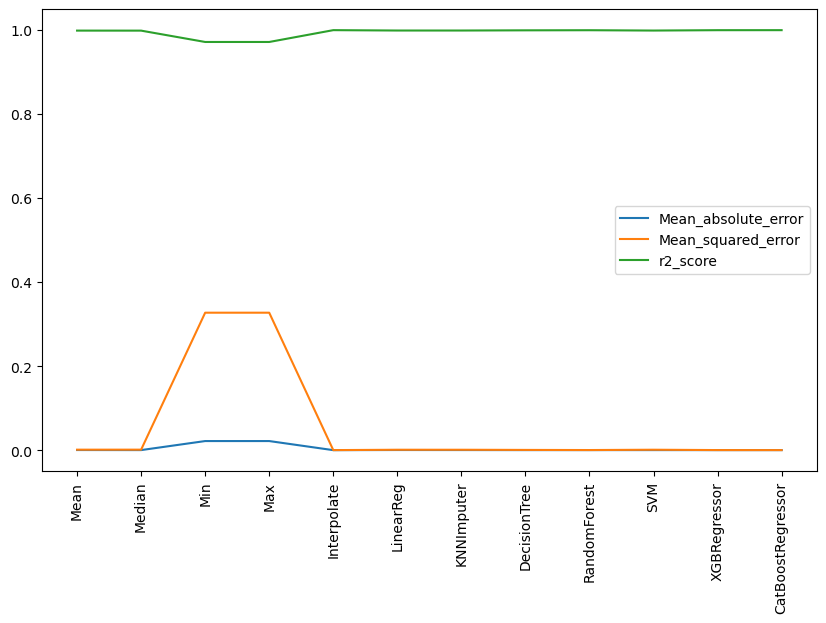

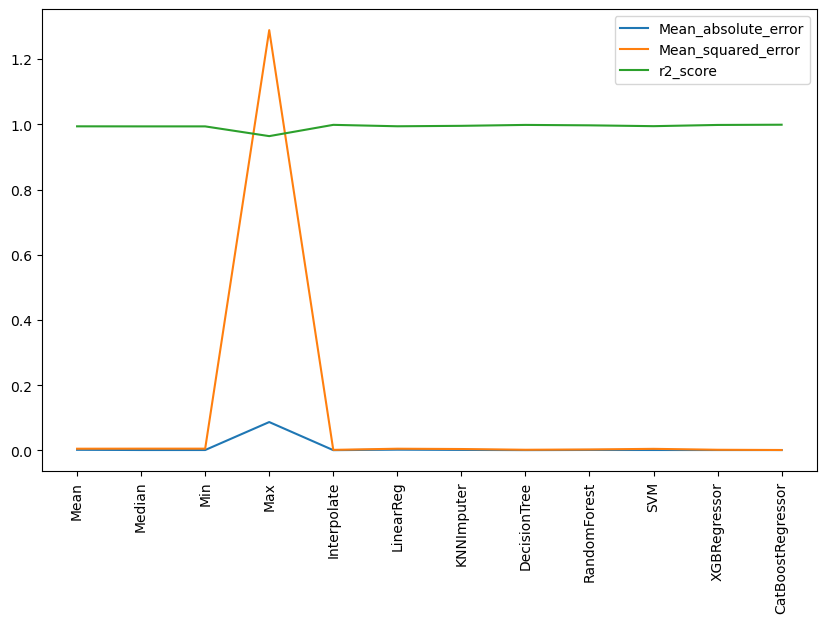

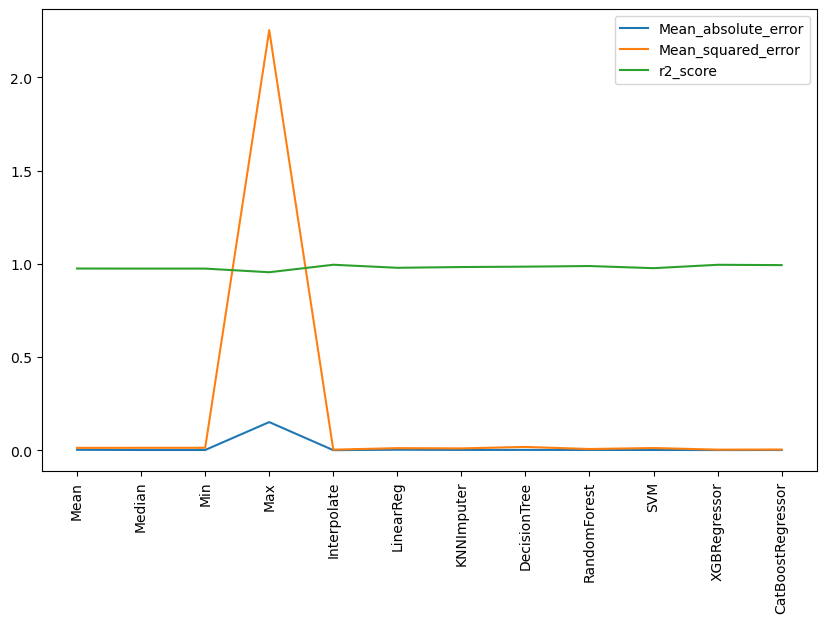

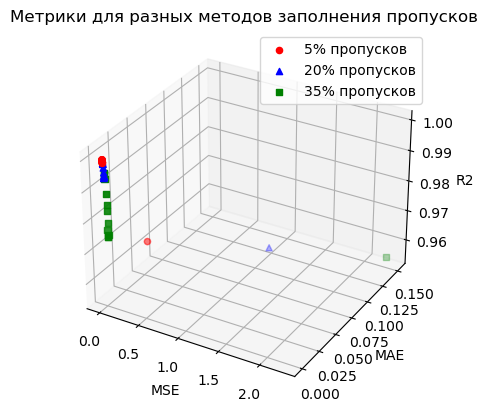

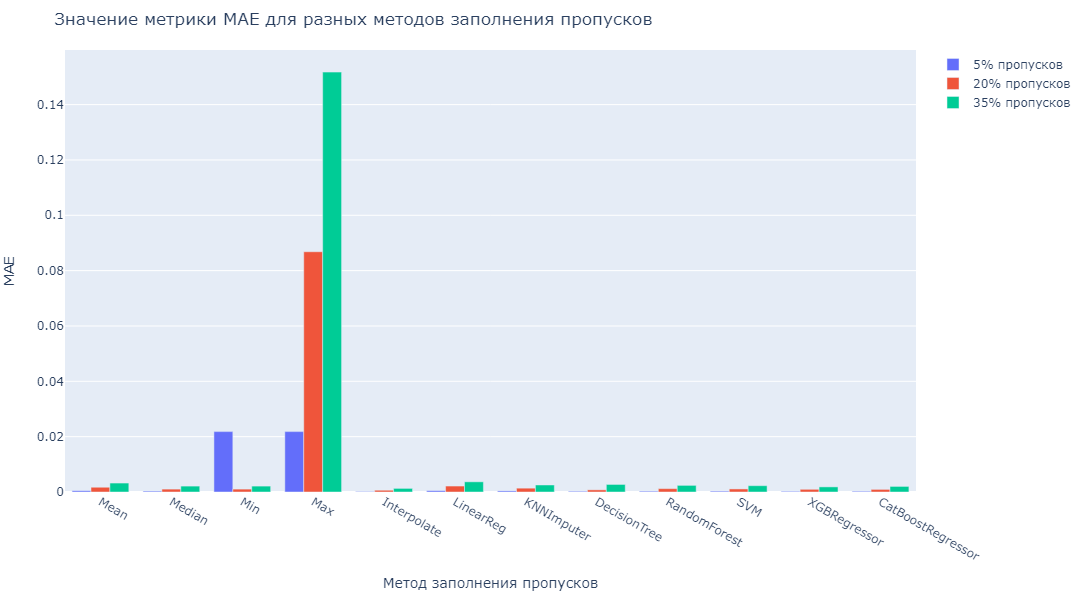

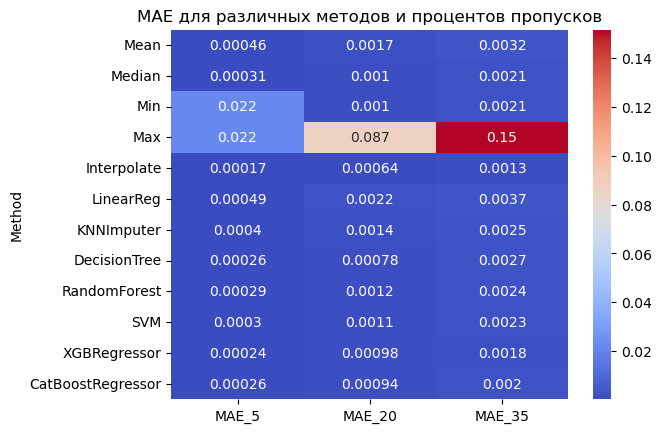

C:\Users\Ivan\Documents\university\ЮФУ_1_курс\Научные работы\Работа 6. Заполнение пропусков\Filling-in-Missing-Values\research\evaluate\results_metrics_visualization.py:143: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\Ivan\Documents\university\ЮФУ_1_курс\Научные работы\Работа 6. Заполнение пропусков\Filling-in-Missing-Values\research\evaluate\results_metrics_visualization.py:144: UserWarning:

FixedFormatter should only be used together with FixedLocator



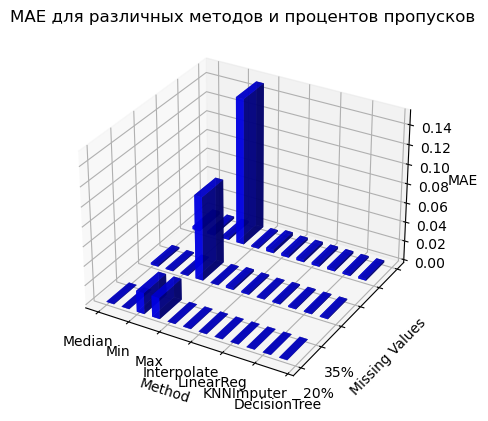

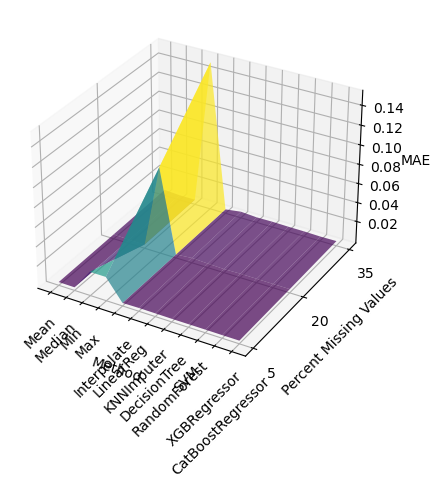

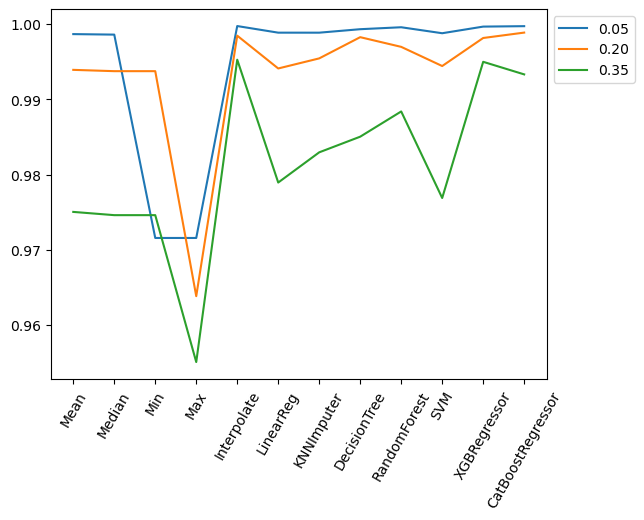

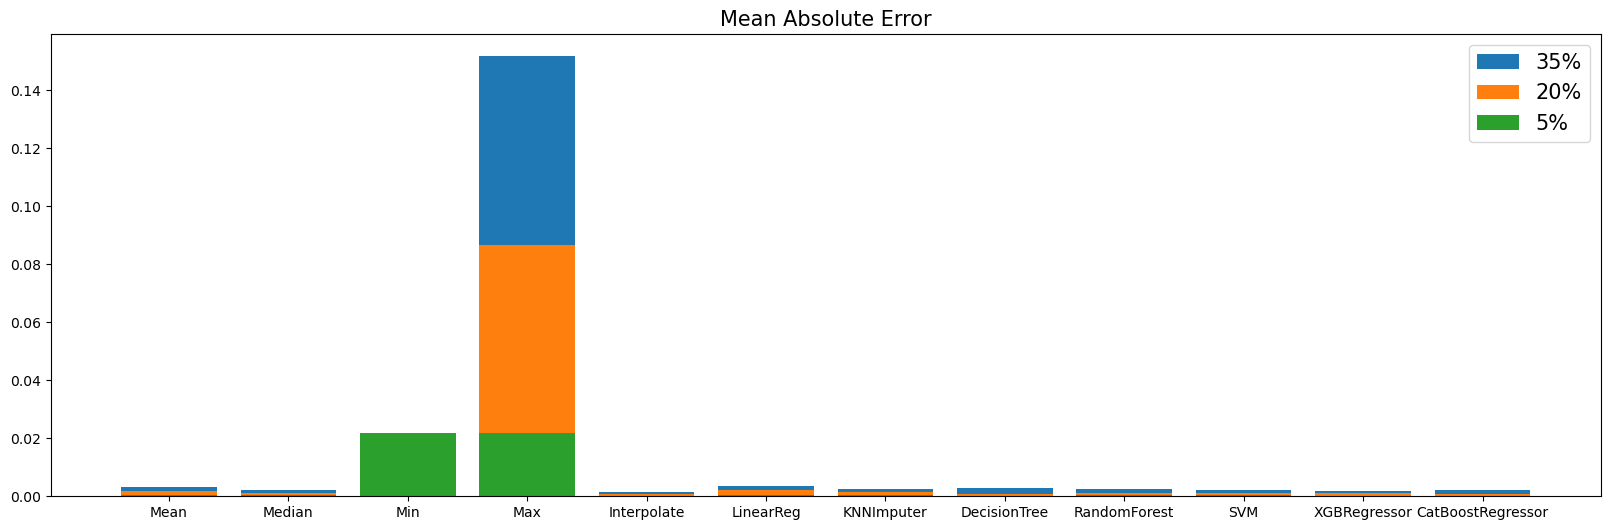

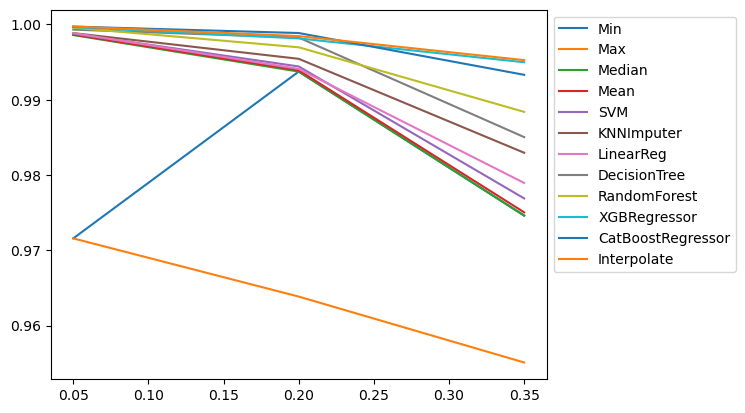

In [40]:
results_metrics_visualization.visualization_results_metrics(df1_result, df15_result, df20_result)